In [1]:
# https://www.scaler.com/topics/deep-learning/lstm-time-series/ 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


2024-11-27 10:01:43.311518: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


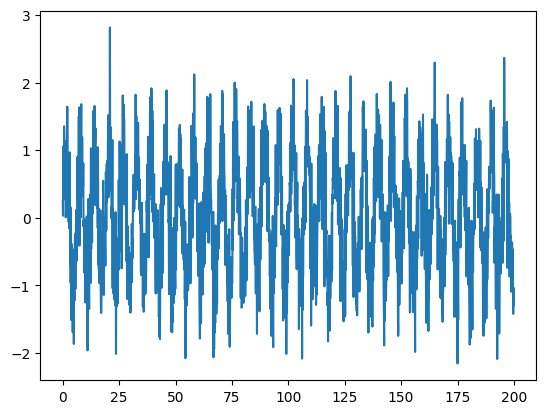

In [2]:
data_time = np.arange(0, 200, 0.1)
sin_values = np.sin(data_time) + np.random.normal(scale=0.5, size=len(data_time))
plt.plot(data_time, sin_values, label='sine (with noise)')


In [3]:
data_full = pd.DataFrame(dict(sine=sin_values), index=data_time, columns=['sine'])
print(data_full.head())

len_train = int(len(data_full) * 0.8)
len_test = len(data_full) - len_train
train, test = data_full.iloc[0:len_train], data_full.iloc[len_train:len(data_full)]
print(train.shape, test.shape)


         sine
0.0  0.248357
0.1  0.030701
0.2  0.522514
0.3  1.057035
0.4  0.272342
(1600, 1) (400, 1)


In [4]:
def gen_data(X, y, num_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - num_steps):
        Xs.append(X.iloc[i:(i + num_steps)].values)       
        ys.append(y.iloc[i + num_steps])
    return np.array(Xs), np.array(ys)
    
num_steps = 10
trainX, trainY = gen_data(train, train.sine, num_steps)
testX, testY = gen_data(test, test.sine, num_steps)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(1590, 10, 1) (1590,)
(390, 10, 1) (390,)


In [5]:
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
lstm_model.add(keras.layers.Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))


/Users/jwheo/Projects/etc_project/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)]


In [7]:
history = lstm_model.fit(
    trainX, trainY, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1,
    shuffle=False,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
)


Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.4064 - val_loss: 0.3598
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3085 - val_loss: 0.3567
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3075 - val_loss: 0.3547
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3068 - val_loss: 0.3529
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3060 - val_loss: 0.3508
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3051 - val_loss: 0.3485
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3041 - val_loss: 0.3466
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3033 - val_loss: 0.3452
Epoch 9/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3027 - val_loss: 0.3442
Epoch 10/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3022 - val_loss: 0.3435
Epoch 11/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3017 - val_loss: 0.3428
Epoch 12/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3

In [8]:
lstm_model.evaluate(testX, testY)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3074 


0.3047269284725189

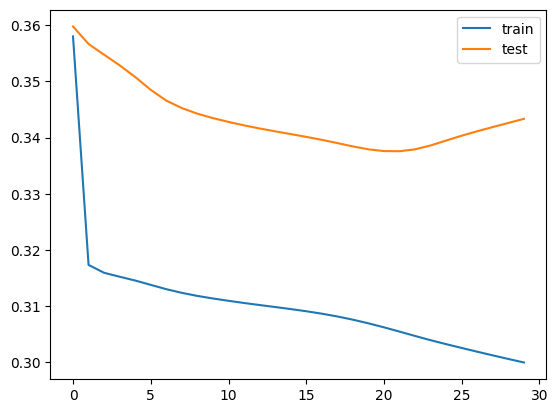

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
(390, 1)


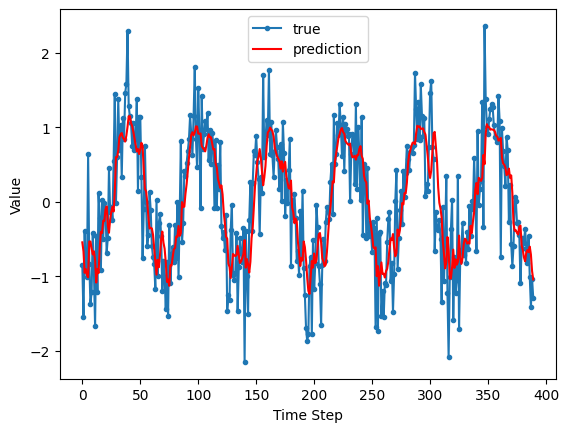

In [10]:
y_pred = lstm_model.predict(testX)
print(y_pred.shape)
plt.plot(testY, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()
